In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
%matplotlib inline 

In [2]:
bank_personal_loan_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_personal_loan_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [3]:
# Understading the columns of the data set:-
# The target column/feature is the 'personal loan' as it indicates if the customer opted for it or not
# The ID column is only for reference purpose and hence it can be dropped from the computations as it does not add any value
bank_personal_loan_df = bank_personal_loan_df.drop(["ID"], axis = 1)
# Remaining columns would act as independent variables
bank_personal_loan_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [4]:
#Q2 - Data distribution of each attribute/feature and findings
print(bank_personal_loan_df.shape)
bank_personal_loan_df.info()

(5000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


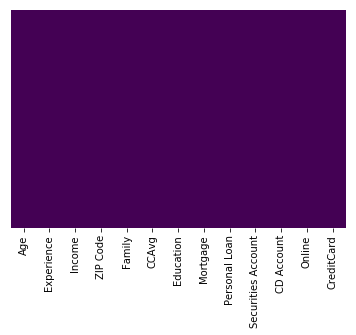

In [5]:
sns.heatmap(bank_personal_loan_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
bank_personal_loan_df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
bank_personal_loan_df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [8]:
#Observations:-
# As Age and Experience have almost 100% positive correlation, either one of them can be removed as it has the almost the same level of correlation with other independent variables. This can help the model be more effecient
# Income and personal loan has a positive correlation of 50.2%; 
# similarly the CCAvg also has a slight positive correlation with Income
#


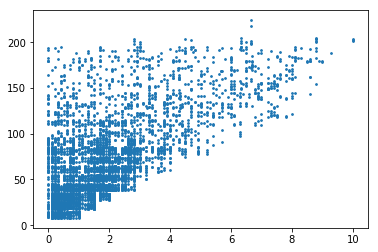

In [9]:
plt.scatter(bank_personal_loan_df.CCAvg, bank_personal_loan_df.Income, s=3)

In [10]:
# The standard deviation (measure of spreadness) is very high for zip codes which is understandable as people from various geographic locations are studies
# However, it is interseting to observe the spread of SD of mortgage variable


In [11]:
#we can use skewness and kurtosis to figure out tail info
#plt.figure(figsize=(17, 10))

#bank_personal_loan_df.plot.area(figsize=(17, 10))
print(bank_personal_loan_df.kurtosis(axis=None))
print(bank_personal_loan_df.skew())
#bank_personal_loan_df.plot.area(figsize=(17, 10))
#Parkin_df.skew() , Parkin_df.kurtosis()

Age                    -1.153067
Experience             -1.121523
Income                 -0.044244
ZIP Code              486.204272
Family                 -1.403586
CCAvg                   2.646706
Education              -1.546116
Mortgage                4.756797
Personal Loan           5.529589
Securities Account      4.701013
CD Account             11.633404
Online                 -1.844883
CreditCard             -1.182191
dtype: float64
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64


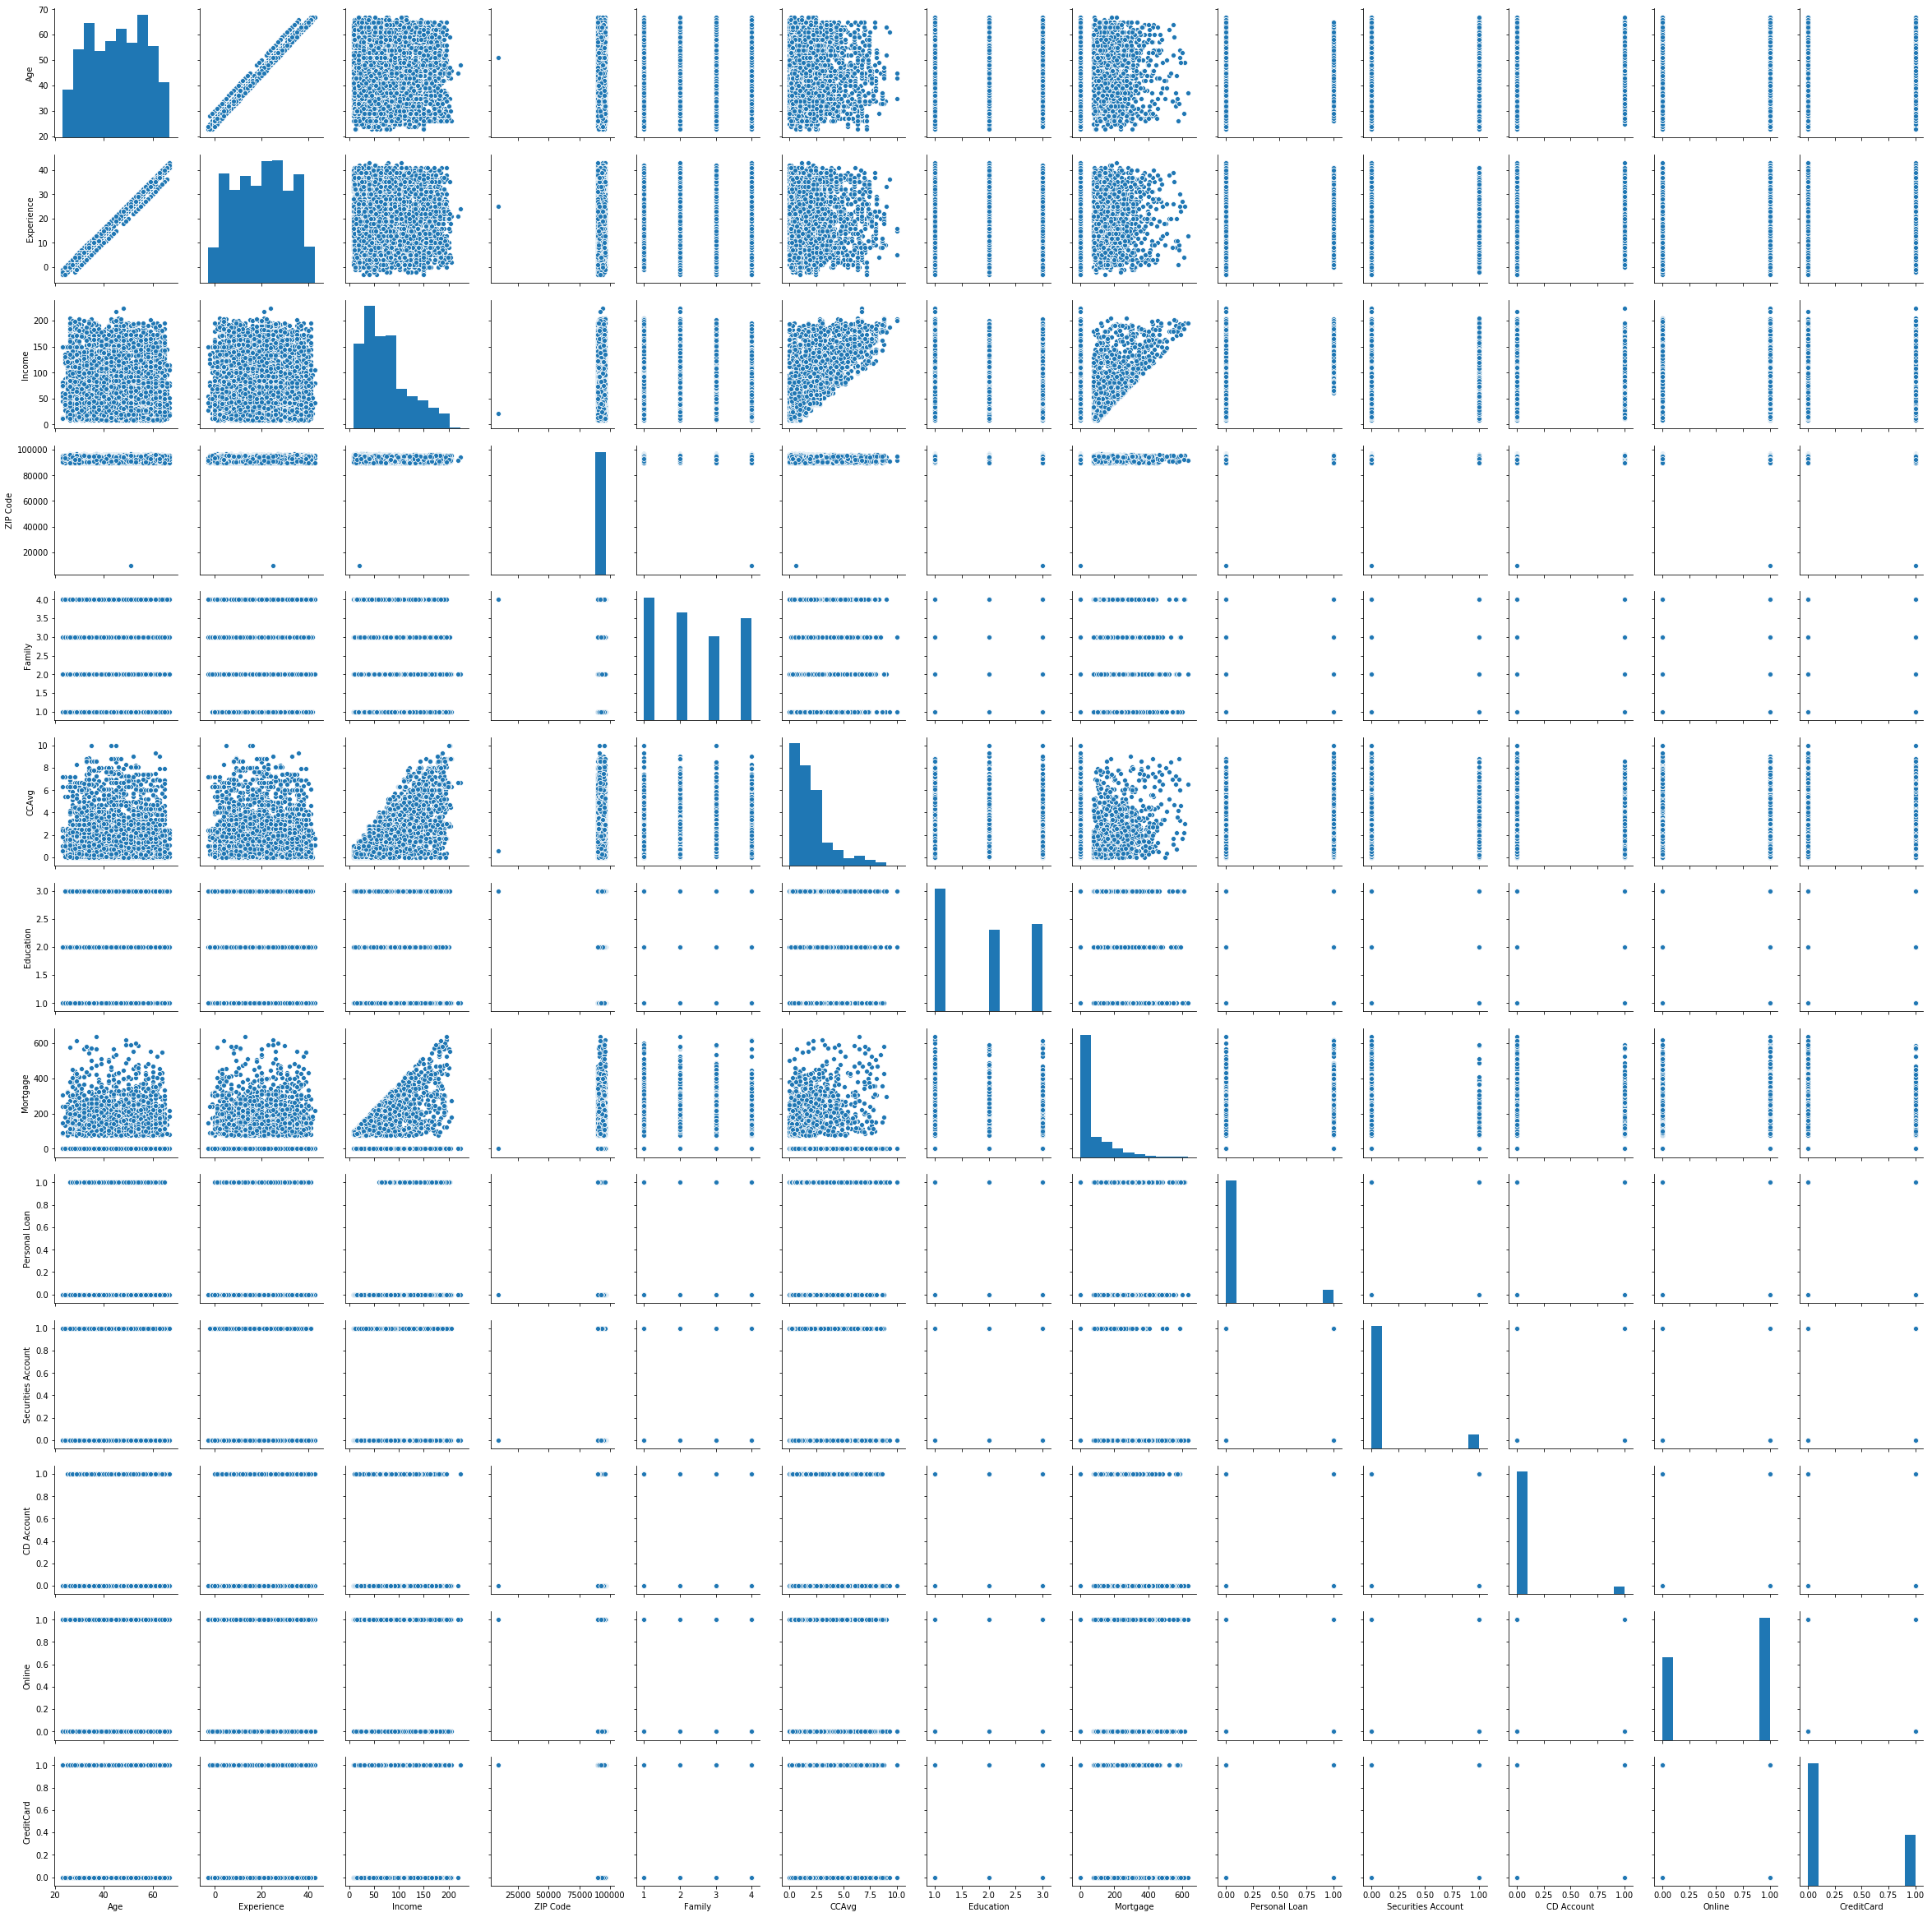

In [12]:
# Q2 - Let us analyze the different attributes for distribution and the correlation by using scatter matrix

sns.pairplot(bank_personal_loan_df)

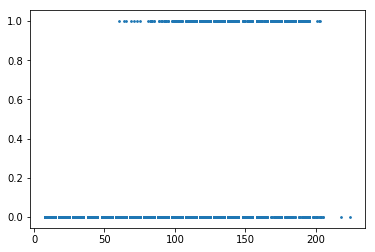

In [13]:
#Q3 - Target column distriution
plt.scatter(bank_personal_loan_df['Income'], bank_personal_loan_df['Personal Loan'], s=3)
# It is interesting to observer that if the income is less than approximately 60, the customer has not opted for a personal loan

In [14]:
# Separate the independent attributes i.e. columns 0 to 13 except column 9)  and store them in X array
# Store the target column (column 9 as ID column was dropped) into Y array

array = bank_personal_loan_df.values
Y = bank_personal_loan_df['Personal Loan'] # select all rows and first 7 columns which are the attributes
bank_personal_loan_df1 = bank_personal_loan_df.copy(deep = True)
X = bank_personal_loan_df1.drop(["Personal Loan"], axis = 1)


In [15]:
# Q5 - i - Build model using Guissian Naive Bayes
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [16]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500

[[1238  124]
 [  56   82]]


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.88

In [19]:
#Q5 - ii - Build the model using KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')

# weights :  optional (default = ‘uniform’)
#weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [20]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
predicted_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_labels)

0.9073333333333333

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_labels)

array([[1355,    7],
       [ 132,    6]], dtype=int64)

In [23]:
#Q5 - iii - Build model using logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)


C:\Users\SRM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
predictions = logmodel.predict(X_test)

In [25]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [27]:
confusion_matrix(y_test,predictions)

array([[1335,   27],
       [  96,   42]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.918

In [29]:
# While looking the score Logistic Regression is the best model when compared to KNN and Naive Bayesian